<a href="https://colab.research.google.com/github/ShoaibMuhammad123/Pytorch/blob/main/Pytorch8_GPU_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Now we train the Neural Network on GPU**

In [ ]:
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np

In [ ]:
# set random set for reproducibility

torch.manual_seed(42)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('using device:',device)

using device: cuda


In [ ]:
df = pd.read_csv('/content/fashion-mnist_train.csv')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

,label
0,2
1,9
2,6
3,0
4,3


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
X_train.shape

(48000, 784)

In [ ]:
X_test.shape

(12000, 784)

In [ ]:
# scaling

X_train = X_train/255
X_test =X_test/255


## **CustomDataSet Class**

In [ ]:
class CustomDataset(Dataset):

  # define constructor
  def __init__(self,features,labels):
    self.features = torch.tensor(np.array(features),dtype=torch.float32)
    self.labels = torch.tensor(np.array(labels),dtype=torch.long)

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self,index):
    return self.features[index],self.labels[index]



In [ ]:
# creating instance of customdataset class
train_data  = CustomDataset(X_train,y_train)


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
        0.5333, 0.0000, 0.0000, 0.0000, 

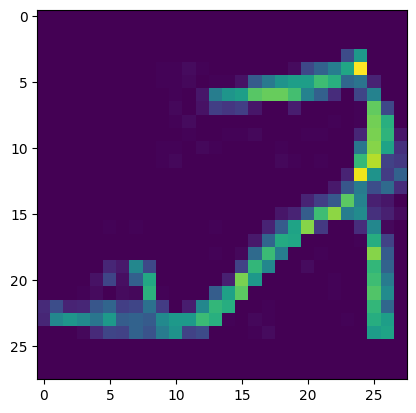

In [ ]:
# You can see over here that each input and its label is placed in one side by this function by CustomDataset
for i , j in train_data:
  print(i,j)
  plt.imshow(np.array(i).reshape(28,28))
  break

In [ ]:
len(train_data)

48000

In [ ]:
test_data = CustomDataset(X_test,y_test)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

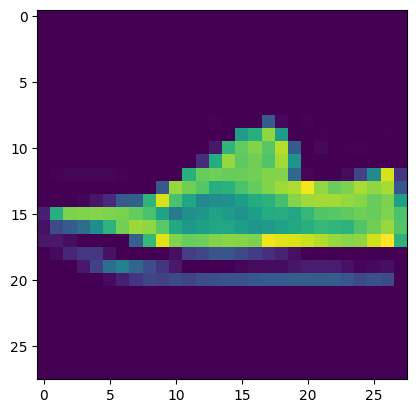

In [ ]:
for i , j in test_data:
  print(i,'This is label',j)
  plt.imshow(np.array(i).reshape(28,28))   # you can also use tensor instead of np.array
  break                                   # break only used because i wannt only to check a single image indepandant features and its label

In [ ]:
len(test_data)

12000

In [ ]:
# Data Loader

train_loader = DataLoader(train_data,batch_size = 32,shuffle=True)
test_loader = DataLoader(test_data,batch_size = 32,shuffle=False)

In [ ]:
len(train_loader)

1500

In [ ]:
32 * 1500    # you can see that we have 1500 batches each batch has 32 images

48000

In [ ]:
for batch_feature , batch_label in train_loader:
  print(batch_feature)
  print(batch_label)
  print('*'*40)

Streaming output truncated to the last 5000 lines.
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([8, 8, 4, 8, 2, 0, 2, 4, 2, 0, 5, 0, 0, 4, 0, 0, 6, 6, 3, 2, 5, 0, 4, 4,
        8, 7, 5, 7, 0, 0, 3, 6])
****************************************
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000]])
tensor([7, 2, 3, 7, 3, 6, 7, 3, 3, 1, 2, 9, 2, 4, 6, 0, 2, 6, 4, 8, 3, 4, 5, 4,
        6, 2, 4, 9, 3, 8, 9, 6])
******************************

In [ ]:
len(batch_feature)

32

# **Design Neural Network**

In [ ]:
class MyANN(nn.Module):
  def __init__(self,num_features):


    super().__init__()

    self.model = nn.Sequential(

        nn.Linear(num_features,128 ),
        nn.ReLU(),

        nn.Linear(128,64),
        nn.ReLU(),

        nn.Linear(64,10)
    )

# forward pass
  def forward(self,x):
    return self.model(x)



In [ ]:
# learning rate and epochs
epochs = 100
learning_rate =0.1


In [ ]:
X_train.shape

(48000, 784)

In [ ]:
batch_label.shape,batch_feature.shape

(torch.Size([32]), torch.Size([32, 784]))

In [ ]:
# instantiate the object of the class

model = MyANN(X_train.shape[1])
model.to(device)

MyANN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# loss function
criterion = nn.CrossEntropyLoss()

# optimizer

optimizer =torch.optim.SGD(model.parameters(),lr = learning_rate)

# **Training Pipeline**

In [ ]:
for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_feature,batch_label in train_loader:

    # move data to gpu
    batch_feature,batch_label = batch_feature.to(device),batch_label.to(device)

    # forward pass
    outputs = model(batch_feature)

    # loss function
    optimizer.zero_grad()
    loss = criterion(outputs , batch_label )

    # backward pass
    loss.backward()


    # update parameter
    optimizer.step()

    total_epoch_loss = total_epoch_loss+loss.item()

  avg_loss = total_epoch_loss/len(train_loader)

  print(f'Epoch: {epoch} and Loss {avg_loss}')


Epoch: 0 and Loss 0.6334425891339779
Epoch: 1 and Loss 0.42679032776256404
Epoch: 2 and Loss 0.38278879946966965
Epoch: 3 and Loss 0.35502808839579425
Epoch: 4 and Loss 0.33831016879777115
Epoch: 5 and Loss 0.3194489045565327
Epoch: 6 and Loss 0.3050046163176497
Epoch: 7 and Loss 0.29484150008608895
Epoch: 8 and Loss 0.2832480504612128
Epoch: 9 and Loss 0.2746879562288523


In [ ]:

batch_label

tensor([3, 2, 5, 3, 1, 4, 0, 3, 1, 1, 5, 7, 4, 3, 1, 4, 4, 4, 9, 2, 3, 8, 0, 5,
        9, 2, 6, 2, 2, 2, 4, 6], device='cuda:0')

In [ ]:
# Set the model into Evaluation Mode

model.eval() # now youare in evaluation mode

MyANN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

## **Evaluation Code Manually**

#**Accuracy on test data**

In [ ]:
total = 0
correct = 0

with torch.no_grad():  # No gradients are needed for testing
    for batch_feature, batch_label in test_loader:

       # move data to gpu
        batch_feature,batch_label = batch_feature.to(device),batch_label.to(device)

        # Forward pass
        y_pred = model(batch_feature)

        # Get the predicted class indices
        _, predicted = torch.max(y_pred, 1)  # Use y_pred here (not outputs)

        # Ensure batch size is correctly tracked
        batch_size = batch_label.size(0)

        total += batch_size
        correct += (predicted == batch_label).sum().item()

# Calculate and print accuracy
accuracy = correct / total
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8728


# **Accuracy on training data**

In [ ]:
total = 0
correct = 0

with torch.no_grad():  # No gradients are needed for testing
    for batch_feature, batch_label in train_loader:

       # move data to gpu
        batch_feature,batch_label = batch_feature.to(device),batch_label.to(device)

        # Forward pass
        y_pred = model(batch_feature)

        # Get the predicted class indices
        _, predicted = torch.max(y_pred, 1)  # Use y_pred here (not outputs)

        # Ensure batch size is correctly tracked
        batch_size = batch_label.size(0)

        total += batch_size
        correct += (predicted == batch_label).sum().item()

# Calculate and print accuracy
accuracy = correct / total
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8964


# -------------------------------------------------
### After Running the whole **60000** images on **GPU** the **training accuracy is 97% and Testing accuracy is 88% **if you see below b**efore that on subset of this data we had used only 6000 at that time Training accuracy is 99% and Testing Accuracy is 83 %**
# -------------------------------------------------

### ***Lecture 07***

## **Before running on the GPU , Running the 6000 subset data in CPU**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch


In [ ]:
# data loading

df = pd.read_csv('/content/fmnist_small.csv')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,120,108,0,0,4,6,11,...,243,255,255,251,242,236,230,246,228,0,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,202,213,210,205,204,221,157,172,131,55,...,0,77,157,148,155,146,151,149,152,154,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,47,136,31,136,42,0,3,0,...,138,152,160,152,162,144,208,181,1,18,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,29,132,0,0,101,10,0,2,0,0,...,155,178,149,163,165,138,147,170,149,134,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
x.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,120,108,0,0,4,6,11,17,...,243,255,255,251,242,236,230,246,228,0,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,202,213,210,205,204,221,157,172,131,55,0,...,0,77,157,148,155,146,151,149,152,154,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0


In [ ]:
y.head(3)

,label
0,9
1,7
2,0


In [ ]:
df.shape

(6000, 785)

In [ ]:
x_train.max()

,0
pixel1,0.000000
pixel2,0.011765
pixel3,0.023529
pixel4,0.211765
pixel5,0.635294
...,...
pixel780,1.000000
pixel781,0.921569
pixel782,1.000000
pixel783,0.752941


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
# scaling
x_train  = x_train /255
x_test  = x_test /255

In [ ]:
x_trian.shape

(4800, 784)

In [ ]:
x_test.shape

(1200, 784)

# **Custom Dataset Class**

In [ ]:
class CustomDataset(Dataset):
  def __init__(self,features,labels):

    super().__init__()
    self.features = torch.tensor(np.array(features),dtype=torch.float32)
    self.labels = torch.tensor(np.array(labels),dtype=torch.long)

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self, index):
    return self.features[index],self.labels[index]



In [ ]:
train_data = CustomDataset(x_train,y_train)
test_data = CustomDataset(x_test,y_test)

In [ ]:
train_data

# **Data Loader**

In [ ]:
new_train_loader = DataLoader(train_data,batch_size=33,shuffle=True)
new_test_loader = DataLoader(test_data,batch_size=33,shuffle=False)

In [ ]:
new_train_loader

In [ ]:
for batch_feature,batch_label in new_train_loader:
  print(batch_feature,'\n',batch_label)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) 
 tensor([1, 0, 2, 9, 7, 4, 4, 0, 1, 5, 1, 8, 1, 2, 0, 0, 6, 7, 0, 4, 2, 1, 9, 6,
        8, 6, 7, 8, 2, 5, 5, 9, 1])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0118,  ..., 0.3216, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]) 
 tensor([5, 8, 9, 9, 3, 4, 9, 1, 0, 2, 7, 5, 0, 8, 6, 6, 3, 0, 1, 2, 7, 2, 9, 7,
        5, 1, 2, 3, 7, 3, 2, 5, 9])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0

In [ ]:
train_data[4]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.4196, 0.2902, 0.1725, 0.1882, 0.2314, 0.3098, 0.3412, 0.3137, 0.3216,
         0.3412, 0.3882, 0.3882, 0.3137, 0.4745, 0.4549, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

# **Model Design**

In [ ]:
class MY_NN(nn.Module):

  def __init__(self,input_size):
    super().__init__()

    self.ann = nn.Sequential(
        nn.Linear(input_size,130),
        nn.ReLU(),
        nn.Linear(130,64),
        nn.ReLU(),
        nn.Linear(64,10)

    )

  def forward(self,features):
    return self.ann(features)



In [ ]:
x_train.shape[1]

784

In [ ]:
# object creation
ann = MY_NN(x_train.shape[1],)

In [ ]:
ann

MY_NN(
  (ann): Sequential(
    (0): Linear(in_features=784, out_features=130, bias=True)
    (1): ReLU()
    (2): Linear(in_features=130, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# epochs and learning rate
epochs =100
learning_rate =0.1



In [ ]:
# loss function
new_critersion = nn.CrossEntropyLoss()

In [ ]:
# optimizer
optimizer = torch.optim.SGD(ann.parameters(),lr = learning_rate)

## **Training Loop**

In [ ]:
for epoch in range(epochs):

  total_loss_in_epoch = 0
  for batch_input , batch_label in new_train_loader:

    # forward pass
    y_pred = ann(batch_input)

    # loss function
    optimizer.zero_grad()
    loss = new_critersion(y_pred,batch_label)

    # backward pass
    loss.backward()

    # update parameters
    optimizer.step()


    total_loss_in_epoch +=loss.item()

  new_avg_loss = total_loss_in_epoch /len(new_train_loader)
  print('Epoch: {} and Loss: {}'.format(epoch,new_avg_loss))

Epoch: 0 and Loss: 1.3730172237304792
Epoch: 1 and Loss: 0.805266676087902
Epoch: 2 and Loss: 0.6753638433675243
Epoch: 3 and Loss: 0.5962441561565007
Epoch: 4 and Loss: 0.5488156956964976
Epoch: 5 and Loss: 0.5099651823713355
Epoch: 6 and Loss: 0.47768915148630536
Epoch: 7 and Loss: 0.4506864957001111
Epoch: 8 and Loss: 0.42647178328200563
Epoch: 9 and Loss: 0.39905537481177344
Epoch: 10 and Loss: 0.39299384831157447
Epoch: 11 and Loss: 0.3605037285652879
Epoch: 12 and Loss: 0.34712065501164086
Epoch: 13 and Loss: 0.3335944414138794
Epoch: 14 and Loss: 0.32034829588071123
Epoch: 15 and Loss: 0.3133210469904828
Epoch: 16 and Loss: 0.30059328466041446
Epoch: 17 and Loss: 0.28260094919943646
Epoch: 18 and Loss: 0.2781104710310289
Epoch: 19 and Loss: 0.2612329116729024
Epoch: 20 and Loss: 0.25340638768999546
Epoch: 21 and Loss: 0.2472258160936914
Epoch: 22 and Loss: 0.23456305173570163
Epoch: 23 and Loss: 0.22359770891090777
Epoch: 24 and Loss: 0.22384461403301317
Epoch: 25 and Loss: 0.22

# **Evaluation**

### Accuracy on testing data

In [ ]:
total =0
correct = 0

with torch.no_grad():
  for batch_input ,batch_label in new_test_loader:

    y_pred = ann(batch_input)


    _,predicted = torch.max(y_pred,1)


    # ensure batch size is correctly tracked
    batch_size = batch_label.size(0)

    total+=batch_size
    correct += (predicted == batch_label).sum().item()


accuracy = correct /total
print('Accuracy :',accuracy)

Accuracy : 0.8391666666666666


### Accuracy on training data

In [ ]:
total =0
correct = 0

with torch.no_grad():
  for batch_input ,batch_label in new_train_loader:

    y_pred = ann(batch_input)


    _,predicted = torch.max(y_pred,1)


    # ensure batch size is correctly tracked
    batch_size = batch_label.size(0)

    total+=batch_size
    correct += (predicted == batch_label).sum().item()


accuracy = correct /total
print('Accuracy :',accuracy)

Accuracy : 0.9966666666666667


* This show that accuracy on training data is 99%  and testing data is 83% so, their is a huge gap